In [ ]:
pip install opencv-python --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import cv2
import time
import pandas as pd
import numpy as np
import json

from PIL import Image
import torch 
import torchvision
import torchvision.transforms as T

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/archive (3).zip"


In [ ]:

DIR_IMAGES = '/content/train_dataset/train_images'
DIR_IMAGES_TEST='/content/test/dataset/test_images'

In [ ]:
with open('/content/train_dataset/train.json') as f:
    data_dict = json.load(f)

# Create a list containing the data rows of the table
data = []

# Loop through the elements in the annotations list
for annotation in data_dict['annotations']:
    # Get general bounding box information
    filename = annotation['filename']
    xmin = annotation['bndbox']['xmin']
    ymin = annotation['bndbox']['ymin']
    xmax = annotation['bndbox']['xmax']
    ymax = annotation['bndbox']['ymax']

    
    
    
    if annotation['inbox']:
        for inbox in annotation['inbox']:
            color = inbox['color']
            img_path=image_path = os.path.join('/content/train_dataset/',filename.replace('\\', '/'))

            image = Image.open(img_path)

            # Get image height
            height = image.height
            width=image.width
            data.append({
                    'filename': img_path,
                    'color': color,
                    'x_center': (xmin + xmax) / (2 * width),
                    'y_center': (ymin + ymax) / (2 * height),
                    'bbox_width': (xmax - xmin) / width,
                    'bbox_height': (ymax - ymin) / height
                })
    

# Create a DataFrame from a list of data and save it to a CSV file
df = pd.DataFrame(data)
df.to_csv('traffic_lights.csv', index=False)

In [ ]:
df

In [ ]:
class_map = {
    'red': 0,
    'green': 1,
    'yellow': 2,
    # Add more object classes if needed
}

# Load your DataFrame

# Replace 'color' column values with integers from the class_map
df['color'] = df['color'].replace(class_map)
df

In [ ]:
import os

# Create a dictionary to store image details
image_dict = {}

# Iterate over each row in the dataframe
for idx, row in df.iterrows():
    # Get the filename and details
    filename = row['filename']
    xcenter = row['x_center']
    ycenter = row['y_center']
    bbox_width = row['bbox_width']
    bbox_height = row['bbox_height']
    label = row['color']
    
    # Check if the image is already in the dictionary
    if filename in image_dict:
        # If the image is already in the dictionary, append the details to the existing text file
        with open(image_dict[filename], 'a') as f:
            f.write(f"{xcenter}\t{ycenter}\t{bbox_width}\t{bbox_height}\t{label}\n")
    else:
        # If the image is not in the dictionary, create a new folder and text file for the image
        folder_path = os.path.join('/content', 'images_folder')
        if not os.path.exists(folder_path):
            os.mkdir(folder_path)
        image_path = os.path.join(folder_path, f"{idx}.jpg")
        text_path = os.path.join(folder_path, f"{idx}.txt")
        # Save the image and its details in the text file
        with open(text_path, 'w') as f:
            f.write(f"{label}\t{xcenter}\t{ycenter}\t{bbox_width}\t{bbox_height}\n")
        image_dict[filename] = text_path
        # Copy the image to the folder
        !cp "$filename" "$image_path"


In [ ]:
import os

# Create a dictionary to store image details
image_dict = {}

# Iterate over each row in the dataframe
for idx, row in df.iterrows():
    # Get the filename and details
    filename = row['filename']
    xcenter = row['x_center']
    ycenter = row['y_center']
    bbox_width = row['bbox_width']
    bbox_height = row['bbox_height']
    label = row['color']
    
    # Check if the image is already in the dictionary
    if filename in image_dict:
        # If the image is already in the dictionary, append the details to the existing text file
        with open(image_dict[filename], 'a') as f:
            f.write(f"{xcenter}\t{ycenter}\t{bbox_width}\t{bbox_height}\t{label}\n")
    else:
        # If the image is not in the dictionary, create a new folder and text file for the image
        folder_path = os.path.join('/content', 'images_folder')
        if not os.path.exists(folder_path):
            os.mkdir(folder_path)
        image_path = os.path.join(folder_path, f"{idx}.jpg")
        text_path = os.path.join(folder_path, f"{idx}.txt")
        # Save the image and its details in the text file
        with open(text_path, 'w') as f:
            f.write(f"{label}\t{xcenter}\t{ycenter}\t{bbox_width}\t{bbox_height}\n")
        image_dict[filename] = text_path
        # Copy the image to the folder
        !cp "$filename" "$image_path"


In [ ]:
!zip -r /content/drive/MyDrive/images_folder.zip /content/images_folder


  adding: content/images_folder/ (stored 0%)
  adding: content/images_folder/9187.txt (deflated 44%)
  adding: content/images_folder/8894.jpg (deflated 2%)
  adding: content/images_folder/5282.txt (deflated 61%)
  adding: content/images_folder/1896.jpg (deflated 1%)
  adding: content/images_folder/5531.txt (deflated 32%)
  adding: content/images_folder/516.jpg (deflated 2%)
  adding: content/images_folder/1469.txt (deflated 59%)
  adding: content/images_folder/1180.txt (deflated 63%)
  adding: content/images_folder/4547.txt (deflated 44%)
  adding: content/images_folder/4971.txt (deflated 62%)
  adding: content/images_folder/5049.jpg (deflated 5%)
  adding: content/images_folder/1908.txt (deflated 63%)
  adding: content/images_folder/4027.txt (deflated 52%)
  adding: content/images_folder/8932.txt (deflated 55%)
  adding: content/images_folder/3369.txt (deflated 45%)
  adding: content/images_folder/1754.jpg (deflated 5%)
  adding: content/images_folder/8453.jpg (deflated 2%)
  adding: 

In [ ]:
from google.colab import files
files.download('/content/images_folder.zip')

In [ ]:
!mkdir /content/drive/MyDrive/images_folder

In [ ]:
!cp -r /content/images_folder /content/drive/MyDrive/images_folder/


In [ ]:
import shutil
shutil.make_archive('images_folder', 'zip', 'images_folder')
files.download('images_folder.zip')

NameError: ignored

In [ ]:
import os
import pandas as pd

# Load the data frame

# Create a new directory for the output files
output_dir = 'output1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a dictionary to hold annotations for each image
image_annotations = {}

# Iterate over the rows in the data frame
for _, row in df1.iterrows():
    # Get the image path and annotation details for the current row
    #image_path = os.path.join('/content/train_dataset', row['filename'].replace('\\', '/'))
    image_path=row['filename']
    annotation = f"{row['height']} {row['width']} {row['x_center']} {row['y_center']} {row['class_id']}"

    # If the image has already been seen, append the current annotation to its list
    if image_path in image_annotations:
        image_annotations[image_path].append(annotation)
    # Otherwise, create a new list with the current annotation as the only element
    else:
        image_annotations[image_path] = [annotation]

# Iterate over the dictionary of image annotations
for image_path, annotations in image_annotations.items():
    # Create a directory for the current image, if it doesn't exist
    image_dir = os.path.join(output_dir, os.path.dirname(image_path))
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    # Write the annotation text file for the current image
    annotation_path = os.path.join(image_dir, os.path.basename(image_path).replace('.jpg', '.txt'))
    with open(annotation_path, 'w') as f:
        f.write('\n'.join(annotations))

    # Copy the image to the output directory
    image_dest = os.path.join(image_dir, os.path.basename(image_path))
    shutil.copy(image_path, image_dest)


In [ ]:
import os
import shutil

# Create output directory
output_dir = 'output2'
os.makedirs(output_dir, exist_ok=True)

# Group rows by filename
groups = df1.groupby('filename')

# Iterate over groups and create annotation files
for filename, group in groups:
    # Get the output file path
    output_file = os.path.join(output_dir, os.path.splitext(os.path.basename(filename))[0] + '.txt')
    
    # Write the annotation text file for the current group
    with open(output_file, 'w') as f:
        for index, row in group.iterrows():
            # Write the annotation in the format required by YOLOv4
            annotation = f"{row['class_id']} {row['x_center']} {row['y_center']} {row['width']} {row['height']}\n"
            f.write(annotation)

    # Copy the image file to the output directory
    src_path = filename
    dest_path = os.path.join(output_dir, os.path.basename(filename))
    shutil.copyfile(src_path, dest_path)


In [ ]:
os.path.splitext(os.path.basename('/content/train_dataset/train_images/03000.jpg'))[0]

True

In [ ]:
print(os.getcwd())

/content


In [ ]:
import pandas as pd
import os

# Load the data frame

# Create a new directory for the output files
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the rows in the data frame
for _, row in df.iterrows():
    # Create a new directory for the current image, if it doesn't exist
    image_dir = os.path.join(output_dir, row['image'])
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    
    # Write the annotation text file for the current row
    filename = os.path.join(image_dir, f'{row["label"]}.txt')
    with open(filename, 'a') as f:
        f.write(f"{row['x']} {row['y']} {row['w']} {row['h']}\n")


# New Section

In [ ]:
# Define object class mapping
class_map = {
    'red': 0,
    'green': 1,
    'yellow': 2,
    # Add more object classes if needed
}

# Convert coordinates to YOLOv4 format
df['x_center'] = (df['xmin'] + df['xmax']) / 2 / width
df['y_center'] = (df['ymin'] + df['ymax']) / 2 / height
df['bbox_width'] = (df['xmax'] - df['xmin']) / width
df['bbox_height'] = (df['ymax'] - df['ymin']) / height

# Convert object class to integer
df['class_id'] = df['color'].map(class_map)

# Create YOLOv4 format text file
with open('your_output_file.txt', 'w') as f:
    for i, row in df.iterrows():
        obj_class = row['class_id']
        x_center = row['x_center']
        y_center = row['y_center']
        bbox_width = row['bbox_width']
        bbox_height = row['bbox_height']
        line = f"{obj_class} {x_center} {y_center} {bbox_width} {bbox_height}\n"
        f.write(line)


In [ ]:
image_name='00002.jpg'
img_path=image_path = os.path.join(DIR_IMAGES, image_name)

image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0
image2 = image
fig, ax = plt.subplots(2, 1, figsize = (14, 14))
ax = ax.flatten()
ax[0].set_title('Original Image')
ax[0].imshow(image)
    
#ax[0].set_title('Original Image')




In [ ]:
unq_values = df["filename"].unique()
print("Total Records: ", len(df))
print("Unique Images: ",len(unq_values))

null_values = df.isnull().sum(axis = 0)
print("\n> Null Values in each column <")
print(null_values)

Total Records:  9422
Unique Images:  2470

> Null Values in each column <
filename    0
xmin        0
ymin        0
xmax        0
ymax        0
color       0
dtype: int64


In [ ]:
classes = df["color"].unique()
print("Total Classes: ",len(classes))
print("\n> Classes <\n",classes)

Total Classes:  3

> Classes <
 ['red' 'green' 'yellow']


In [ ]:
def plot_img(image_name):
    
    fig, ax = plt.subplots(2, 1, figsize = (14, 14))
    ax = ax.flatten()
    
    bbox = df[df['filename'] == image_name]
    img_path = os.path.join(DIR_IMAGES, image_name)
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image2 = image
    
    ax[0].set_title('Original Image')
    ax[0].imshow(image)
    
    for idx, row in bbox.iterrows():
        x1 = row['xmin']
        y1 = row['ymin']
        x2 = row['xmax']
        y2 = row['ymax']
        label = row['color']
        if label == 'red':
            color_brg = (255,0,0)
        elif label == 'green':
            color_brg = (0,255,0)
        elif label == 'yellow':
            color_brg = (0,255,255)
        
        cv2.rectangle(image2, (int(x1),int(y1)), (int(x2),int(y2)), color_brg, 3)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image2, label, (int(x1),int(y1-10)), font, 1, color_brg, 2)
    
    ax[1].set_title('Image with Bondary Box')
    ax[1].imshow(image2)

    plt.show()

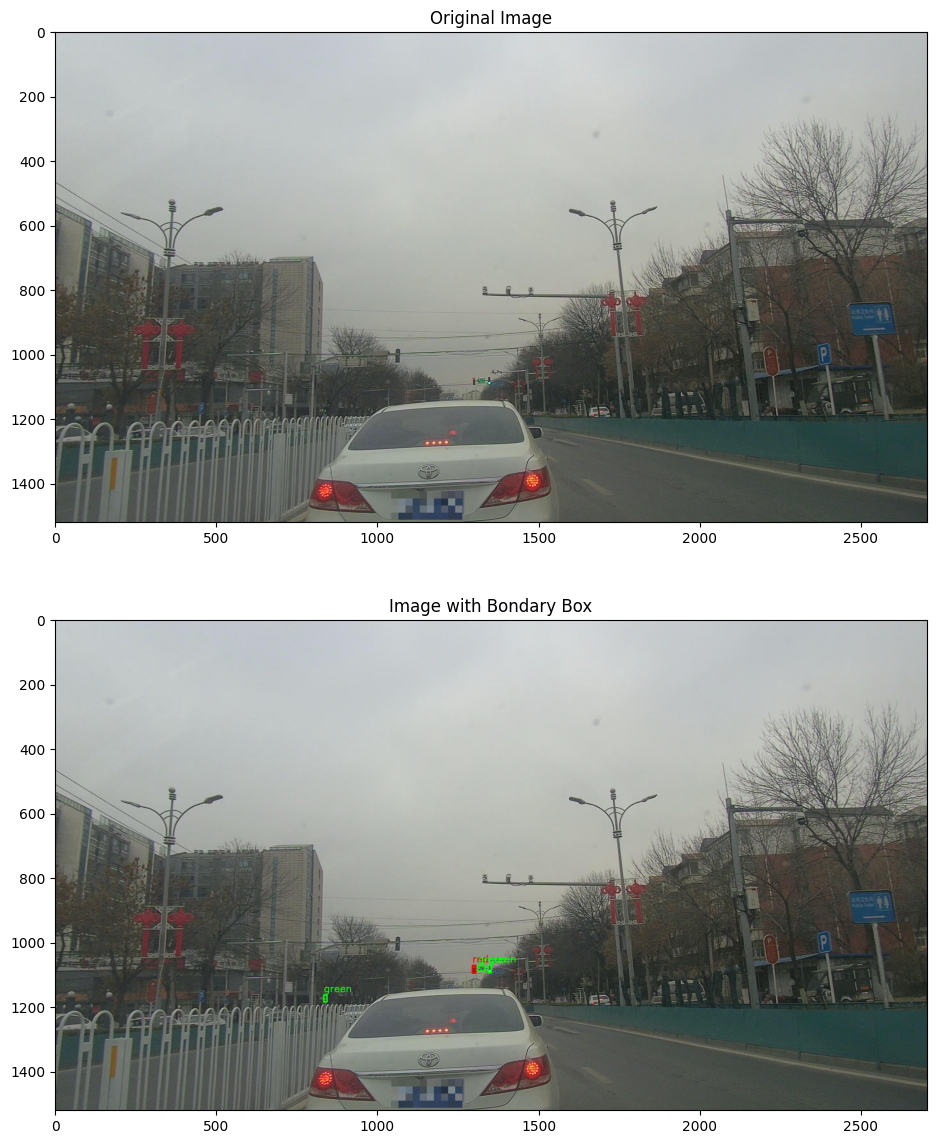

In [ ]:
plot_img("00004.jpg")

In [ ]:
_classes = np.insert(classes, 0, "background", axis=0)        
class_to_int = {_classes[i] : i for i in range(len(_classes))}
int_to_class = {i : _classes[i] for i in range(len(_classes))}
print("class_to_int : \n",class_to_int)
print("\nint_to_class : \n",int_to_class)

class_to_int : 
 {'background': 0, 'red': 1, 'green': 2, 'yellow': 3}

int_to_class : 
 {0: 'background', 1: 'red', 2: 'green', 3: 'yellow'}


In [ ]:

class TrafficLightDetectionDataset(Dataset):
    
    def __init__(self, dataframe, image_dir, mode='train', transforms=None, resize_factor=0.25):
        
        super().__init__()
        
        self.image_names = dataframe['filename'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
        self.mode = mode
        self.resize_factor = resize_factor
        
    def __len__(self):
        return len(self.image_names)
        
    def __getitem__(self, index: int):
        
        #Retrive Image name and its records (x1, y1, x2, y2, classname) from df
        image_name = self.image_names[0]
        image_name
        records = self.df[self.df['filename'] == image_name]
        
        #Loading Image
        img_path=os.path.join(self.image_dir,image_name)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        if self.mode == 'train':
            
            #Get bounding box co-ordinates for each box
            boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values

            #Getting labels for each box
            temp_labels = records[['color']].values
            labels = []
            for label in temp_labels:
                label = class_to_int[label[0]]
                labels.append(label)

            #Converting boxes & labels into torch tensor
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
            
            # Resize the image and the bounding boxes
            height, width, _ = image.shape
            new_height, new_width = int(height * self.resize_factor), int(width * self.resize_factor)
            image = cv2.resize(image, (new_width, new_height))
            boxes = boxes * self.resize_factor
            area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
            
            #Creating target
            target = {}
            target['boxes'] = boxes
            target['labels'] = labels
            target['area'] = torch.as_tensor(area, dtype=torch.float32)

            #Transforms
            if self.transforms:
                image = self.transforms(image)


            return image, target, image_name
        
        elif self.mode == 'test':
            # Resize the image
            height, width, _ = image.shape
            new_height, new_width = int(height * self.resize_factor), int(width * self.resize_factor)
            image = cv2.resize(image, (new_width, new_height))

            if self.transforms:
                image = self.transforms(image)

            return image, image_name
    

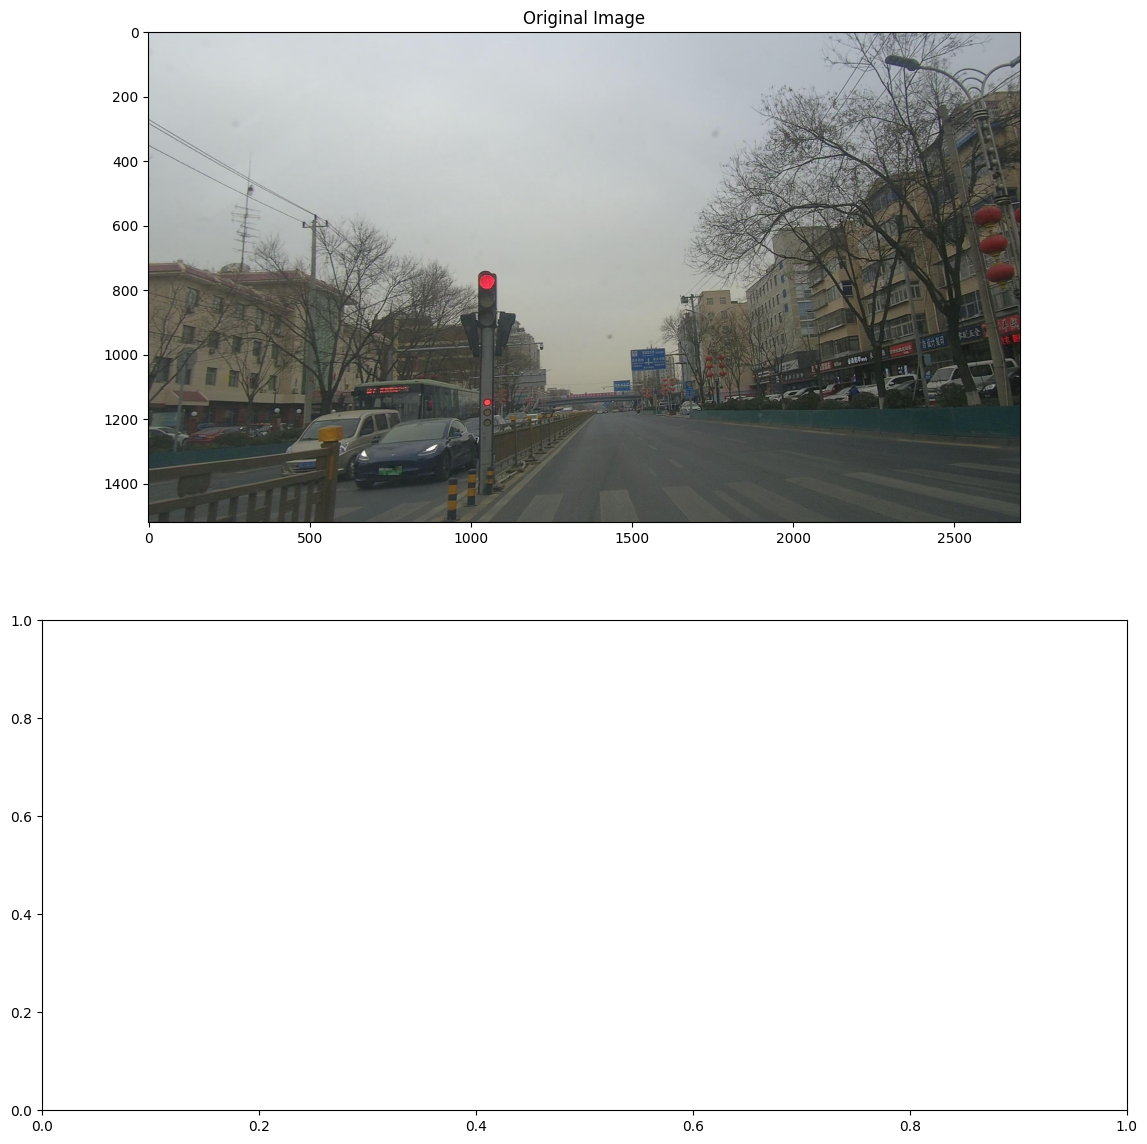

In [ ]:
image_names = df['filename'].unique()
image_name = image_names[0]
image_name
#records = self.df[self.df['filename'] == image_name]

#Loading Image
img_path=os.path.join(DIR_IMAGES,image_name)
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0
fig, ax = plt.subplots(2, 1, figsize = (14, 14))
ax = ax.flatten()
ax[0].set_title('Original Image')
ax[0].imshow(image)
    

In [ ]:
def get_transform():
    return T.Compose([T.ToTensor()])

def collate_fn(batch):
    return tuple(zip(*batch))


# Dataset object
dataset = TrafficLightDetectionDataset(df, DIR_IMAGES, transforms = get_transform())


In [ ]:
# Preparing data for Train & Validation

def get_transform():
    return T.Compose([T.ToTensor()])

def collate_fn(batch):
    return tuple(zip(*batch))


# Dataset object
dataset = TrafficLightDetectionDataset(df, DIR_IMAGES, transforms = get_transform())



# split the dataset in train and test set - using 80% for training, 20% for validation
indices = torch.randperm(len(dataset)).tolist()
train_dataset = torch.utils.data.Subset(dataset, indices[:-490])
valid_dataset = torch.utils.data.Subset(dataset, indices[-490:])


# Preparing data loaders
train_data_loader = DataLoader(
    train_dataset,
    batch_size = 2,
    shuffle = True,
    num_workers = 2,
    collate_fn = collate_fn
)


valid_data_loader = DataLoader(
    valid_dataset,
    batch_size = 2,
    shuffle = True,
    num_workers = 2,
    collate_fn = collate_fn
)

In [ ]:
# Utilize GPU if available

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.cuda.empty_cache()

In [ ]:
# Create / load model

# Faster - RCNN Model - pretrained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None, weights_backbone=None)
num_classes = len(class_to_int)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
# Preparing model for training

# Retriving all trainable parameters from model (for optimizer)
params = [p for p in model.parameters() if p.requires_grad]
# Defininig Optimizer
optimizer = torch.optim.Adam(params, lr = 0.0001)
# LR
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
model.to(device)
# No of epochs
epochs = 5

In [ ]:
# Training model

itr = 1
total_train_loss = []
for epoch in range(epochs):
    start_time = time.time()
    train_loss = []
    for images, targets, image_names in tqdm(train_data_loader):
        # tqdm 
        
        # Loading images & targets on device
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        # Forward propagation
        out = model(images, targets)
        losses = sum(loss for loss in out.values())
        
        # Reseting Gradients
        optimizer.zero_grad()
        
        # Back propagation
        losses.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
        
        # Average loss
        loss_value = losses.item()
        train_loss.append(loss_value)
        
        if itr % 300 == 0:
            print(f"\n Iteration #{itr} loss: {loss_value:.4f} \n") ## {out}
        itr += 1
    lr_scheduler.step() 

    epoch_train_loss = np.mean(train_loss)
    total_train_loss.append(epoch_train_loss)
    print(f'Epoch: {epoch+1}')
    print(f'Epoch train loss is {epoch_train_loss:.4f}')

    
    time_elapsed = time.time() - start_time
    print("Time elapsed: ",time_elapsed)
    
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_train_loss
            }, "checkpoint.pth")

  0%|          | 0/990 [00:00<?, ?it/s]


error: ignored

In [ ]:
cracked_images = os.listdir('/content/train_dataset/train_images')
pathofimage = os.path.join('/content/train_dataset/train_images')
image = Image.open(pathofimage)
##uncracked_image = image. resize((224, 224))
#uncracked_image



In [ ]:
directory = '/content/train_dataset/train_images'
cracked_images = os.listdir(directory)
path_of_image=[]
for image_name in cracked_images:
    path_of_image.append(os.path.join(directory, image_name))
    path_of_images=os.path.join(directory, image_name)
    image = Image.open(path_of_images)
    resized_image = image.resize((224, 224), resample=Image.BILINEAR)
    #resized_image.show() 

In [ ]:
path_of_image